In [1]:
import pytesseract
import cv2
from matplotlib import pyplot as plt
import pandas as pd

In [94]:
# img = cv2.imread(r"C:\Users\muthu\OneDrive\Pictures\Camera Roll\WIN_20240902_15_18_08_Pro.jpg")

#for Muthu
#img = cv2.imread(r'C:\Users\muthu\Documents\bill_ocr\60c4199364474569561cba359d486e6c69ae8cba.jpeg')


# for Chan
#img = cv2.imread(r'C:\Users\chand\Documents\GitHub\iReadYourBills\60c4199364474569561cba359d486e6c69ae8cba.jpeg')

#for kaufland
#img = cv2.imread(r'C:\Users\chand\Documents\GitHub\iReadYourBills\kaufland_4.webp')

#for edeka
img = cv2.imread(r"C:\Users\chand\Documents\GitHub\iReadYourBills\edeka\EdekaBon17-jan.jpg")


In [95]:
# img= img[100:900, 100:900]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
# blur = cv2.medianBlur(gray,11)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
# thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,2) #previously just thresh_binary 
# thresh = cv2.threshold(blur, 128,255,cv2.THRESH_BINARY)[1]

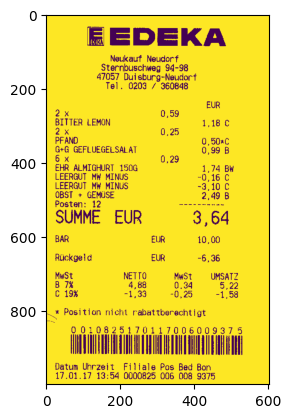

In [96]:
plt.imshow(thresh)
plt.show()

In [7]:
#len(sort_list)-1
sort_list[len(contours)-1]

array([[[349,  81]],

       [[346,  84]],

       [[345,  84]],

       ...,

       [[350,  87]],

       [[352,  85]],

       [[352,  81]]], shape=(4322, 1, 2), dtype=int32)

1


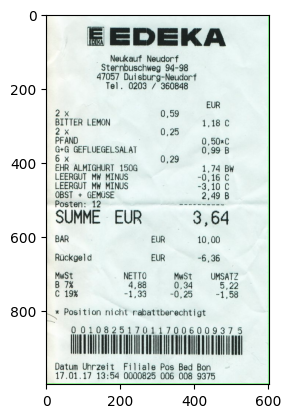

In [97]:
result = img.copy()
#canny = cv2.Canny(blur, 10, 100)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
print(len(contours)) #Prints the number of contours found.
sort_list = sorted(contours, key=lambda x: cv2.contourArea(x))
# count = 0
x,y,w,h = cv2.boundingRect(sort_list[len(contours)-1]) 

cv2.rectangle(result, (x,y), (x+w, y+h), (0,255,0),2)
result = result[y:y+h, x:x+w]
# print(sort)
# for cont in sort:
#     x,y,w,h = cv2.boundingRect(cont)
#     cv2.rectangle(result, (x,y), (x+w, y+h), (0,0,255),2)
    # count = count+1
plt.imshow(result)
plt.show()

In [8]:
for item in sort_list:
    print(cv2.contourArea(item))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [78]:
#pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

#Chan
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [98]:
print(pytesseract.image_to_string(result))

EEDEKA

Neukaut Neudorf
Sternbuschweg 94-98
47057 Dui sburg-Neudort
Tel. 0203 / 360848

EUR
2 x 0,59
BITTER LEMON Test
2X 0,25
PFAND 0,50«C
G+G GEFLUEGELSALAT 0,99 B
6 x 0,29
EHR ALMIGHURT 150G 1,74 BW
LEERGUT MW MINUS -0,16 C
LEERGUT MW MINUS “3,10 C
OBST + GEMUSE 2,49 B
Uh) es a emis

rs

SUMME EUR 3,64
BAR EUR 10,00
Ruckgeld EUR -6, 36
MwSt NETTO MwSt UMSATZ
B 7% 4,88 0,34 5,22
C 19% =1y68 =0,25 “1,58

x Position nicht rabattberechtigt

fii
Datum Uhrzeit Filiale Pos Bed Bon
17.01.17 13:54 0000825 006 008 9375




In [25]:
flag = 'kaufland'

In [ ]:
# Muthu code



text = pytesseract.image_to_string(result)
text = print(text.split()) 
if flag == 'kaufland':

    for index, i in enumerate(text):  #index is a number val and i is the string name.
        print(i)
        

        if i == 'Summe':
            print(i)
            break
    # print(text[index+1])
    
# print(index,i)
        

# print(text[index])

In [102]:
text = pytesseract.image_to_string(result)
words_caseinsens = text.split()
print(words_caseinsens)

['EEDEKA', 'Neukaut', 'Neudorf', 'Sternbuschweg', '94-98', '47057', 'Dui', 'sburg-Neudort', 'Tel.', '0203', '/', '360848', 'EUR', '2', 'x', '0,59', 'BITTER', 'LEMON', 'Test', '2X', '0,25', 'PFAND', '0,50«C', 'G+G', 'GEFLUEGELSALAT', '0,99', 'B', '6', 'x', '0,29', 'EHR', 'ALMIGHURT', '150G', '1,74', 'BW', 'LEERGUT', 'MW', 'MINUS', '-0,16', 'C', 'LEERGUT', 'MW', 'MINUS', '“3,10', 'C', 'OBST', '+', 'GEMUSE', '2,49', 'B', 'Uh)', 'es', 'a', 'emis', 'rs', 'SUMME', 'EUR', '3,64', 'BAR', 'EUR', '10,00', 'Ruckgeld', 'EUR', '-6,', '36', 'MwSt', 'NETTO', 'MwSt', 'UMSATZ', 'B', '7%', '4,88', '0,34', '5,22', 'C', '19%', '=1y68', '=0,25', '“1,58', 'x', 'Position', 'nicht', 'rabattberechtigt', 'fii', 'Datum', 'Uhrzeit', 'Filiale', 'Pos', 'Bed', 'Bon', '17.01.17', '13:54', '0000825', '006', '008', '9375']


In [146]:
# Chan trial code
words = [w.lower() for w in words_caseinsens]
expense_csv = []
date_csv = []
flag = ''
print(words)
if "kaufland" in words:
    if "summe" in words or "eur" in words:
        flag = 'kaufland'
        index = words.index("summe") if "summe" in words else words.index("eur")
        #print(words[index + 1])  # Print the value after "Summe" or "EUR"
        expense_csv.append(words[index+1])
        print(expense_csv)
   
    if "datum" in words:
        index_1 = words.index("datum")
        date_csv.append(words[index_1 +1])
        

elif "eedeka" in words:
    if "summe" in words:
        flag = 'edeka'
        index = words.index("summe")
        #print(words[index + 1])  # Print the value after "Summe"
        expense_csv.append(words[index+2])
        #print(expense_csv)

    if "datum" in words:
        index_1 = words.index("datum")
        for i in range (index_1, len(words)):
            try:

                date_obj = datetime.strptime(words[i], "%d.%m.%y")
                print(date_obj)
                date_csv.append(words[i])

            except:
                pass


        
        # date_csv.append(words[index_1 +6])
        #print(date_csv)
        
        
        

        

['eedeka', 'neukaut', 'neudorf', 'sternbuschweg', '94-98', '47057', 'dui', 'sburg-neudort', 'tel.', '0203', '/', '360848', 'eur', '2', 'x', '0,59', 'bitter', 'lemon', 'test', '2x', '0,25', 'pfand', '0,50«c', 'g+g', 'gefluegelsalat', '0,99', 'b', '6', 'x', '0,29', 'ehr', 'almighurt', '150g', '1,74', 'bw', 'leergut', 'mw', 'minus', '-0,16', 'c', 'leergut', 'mw', 'minus', '“3,10', 'c', 'obst', '+', 'gemuse', '2,49', 'b', 'uh)', 'es', 'a', 'emis', 'rs', 'summe', 'eur', '3,64', 'bar', 'eur', '10,00', 'ruckgeld', 'eur', '-6,', '36', 'mwst', 'netto', 'mwst', 'umsatz', 'b', '7%', '4,88', '0,34', '5,22', 'c', '19%', '=1y68', '=0,25', '“1,58', 'x', 'position', 'nicht', 'rabattberechtigt', 'fii', 'datum', 'uhrzeit', 'filiale', 'pos', 'bed', 'bon', '17.01.17', '13:54', '0000825', '006', '008', '9375']
2017-01-17 00:00:00


In [115]:
words.index("datum")

84

In [147]:
date_csv

['17.01.17']

In [138]:

from datetime import datetime
ran = words[words.index("datum")+6]
# print(int(ran))
# print(ran.isnumeric())
ran = "1dnfi" 
date_obj = datetime.strptime(ran, "%d.%m.%y")
# format = '%d/%m/%Y'
# res = datetime.datetime.strptime(ran, format).date()
print(date_obj)

ValueError: time data '1dnfi' does not match format '%d.%m.%y'

In [142]:
data ={"Shop":[flag], "Date":[date_csv], "expense":[expense_csv]}
#print(data)
df = pd.DataFrame(data)

df.index+=1
print(df)
df.to_csv('list.csv', index = True, index_label="ID", header = True)  # Append to the CSV file


    Shop        Date expense
1  edeka  [17.01.17]  [3,64]


In [51]:
df

,Shop,Date,expense
1,kaufland,14.05.24,"13,79"


In [ ]:
# cap = cv2.VideoCapture(1)
# i = 0
# flag = 'kaufland'
# while True:
#     i=i+1
#     ret, frame = cap.read()
    
#     cv2.imshow("frame", frame)
#     # if i>100:
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     blur = cv2.GaussianBlur(gray, (3,3), 0)
#     ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
#     result = frame.copy()
#     contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     # print(len(contours))
#     sort = sorted(contours, key=lambda x: cv2.contourArea(x))
#     x,y,w,h = cv2.boundingRect(sort[len(contours)-1])
#     cv2.rectangle(result, (x,y), (x+w, y+h), (0,0,255),2)
#     result = result[y:y+h, x:x+w]
#     text = pytesseract.image_to_string(result)
#     text = text.split()
#     # print(text)
    
#     # if flag == 'kaufland':
#     for i in range(len(text)):
        
#         if text[i] in centers:
#             shop = text[i]
#         # else:
#         #     shop = "not found"
    

#         if text[i] == 'Summe':
#         # print(text[i+1])
#             num = text[i+1]
#         # else:
#         #     num = "not found"
    
    
#         if text[i] == 'Datum':
#             date = text[i+1]
#         # else:
#         #     date = "not found"
        
    
        

#     #         # print(i)
            

#     #         if i == 'Summe':
#     #             print(i)
#     #             break
#     # print(text[index+1])
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()
# contributor = 'Muthu'

# Shop = shop
# date = date
# cost = num

# df.loc[len(df)] = [contributor, Shop, date, cost]
# print(df)

  Contributor       Shop       Date       Cost
0       Muthu  not found  not found  not found
1       Muthu   Kaufland  not found  not found
2       Muthu  not found  not found  not found
3       Muthu  not found  not found  not found
4       Muthu  not found  not found  not found
5       Muthu   Kaufland         00  not found
6       Muthu   Kaufland  :03.12.23  not found
7       Muthu   Kaufland  :03.12.23  not found
8       Muthu   Kaufland  :03.12.23  not found
9       Muthu   Kaufland  :03.12.23       0/99
